In [1]:
from typing import Union
import os
import random
from matplotlib import pyplot as plt
from einops import rearrange
import PIL
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import Grayscale
from torchvision.transforms.functional import to_pil_image
import torch
import numpy as np
from src.dataset.vitonhd import VITONHDDataset
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

/home/jupyter/H-engine/.venv/lib/python3.8/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.Op.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
/home/jupyter/H-engine/.venv/lib/python3.8/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.OnnxFunction.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()


In [2]:
data_path = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd')
dataset = VITONHDDataset(data_path, use_trainset=True, use_dilated_relaxed_mask=True, random_dilate_mask=True)
len(dataset)

11647

### Test

In [4]:
sample = dataset[0]
for k, v in sample.items():
    if isinstance(v, torch.Tensor):
        print(f'{k}: {v.shape}')

image: torch.Size([3, 1024, 768])
masked_image: torch.Size([3, 1024, 768])
mask: torch.Size([1, 1024, 768])
densepose: torch.Size([3, 1024, 768])
cloth_raw: torch.Size([3, 1024, 768])


In [8]:
mask = dataset[0]['mask']
mask.shape

torch.Size([1, 1024, 768])

In [3]:
assert len(dataset.im_paths) == len(dataset.m_paths)
mismatch = 0
mismatch_fnames = []
for img_path, mask_path in zip(dataset.im_paths, dataset.m_paths):
    img_fname = str(img_path).split('/')[-1].split('.')[0][:5]
    mask_fname = str(mask_path).split('/')[-1].split('.')[0][:5]
    if img_fname != mask_fname:
        mismatch += 1
        mismatch_fnames.append([img_fname, mask_fname])
print(f'# of files: {len(dataset)}')
print(f'# of mismatch files: {mismatch}')
print(mismatch_fnames)

# of files: 11647
# of mismatch files: 0
[]


In [4]:
path = '/home/hosjiu/workspace/heatmob/vto-engine/datasets/vitonhd/train/image/04274_00.jpg'
path.split('/')[-1].split('.')[0]

'04274_00'

In [4]:
# get random sample
dataset_len = len(dataset)
rand_idx = random.randint(0, dataset_len - 1)
rand_sample = dataset[rand_idx]

In [6]:
rand_sample.keys()

dict_keys(['im_name', 'c_name', 'original_image', 'image', 'masked_image', 'mask', 'densepose', 'cloth_raw'])

In [7]:
rand_sample['im_name']

'05893_00.jpg'

### Show

In [3]:
def show(img: Union[torch.Tensor, PIL.Image.Image], print_shape: bool = False):
    if isinstance(img, PIL.Image.Image):
        img = pil_to_tensor(img)

    if img.ndim == 3:
        img = rearrange(img, 'c h w -> h w c')
    else:
        raise ValueError('Only support for RGB image for now.')

    if print_shape:
        print(img.shape)

    plt.imshow(img)

torch.Size([1024, 768, 3])


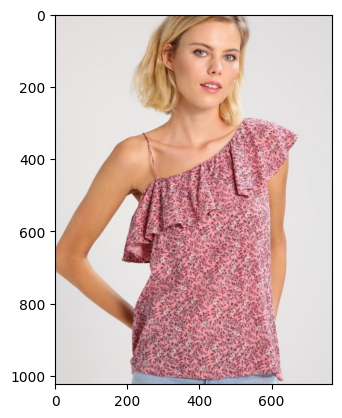

In [10]:
show(rand_sample['original_image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


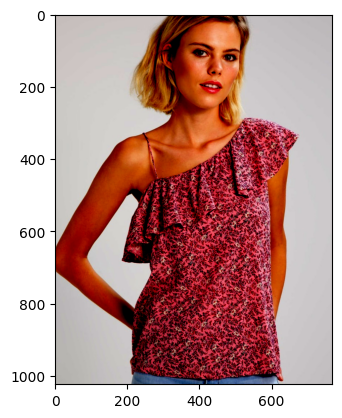

In [11]:
show(rand_sample['image'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


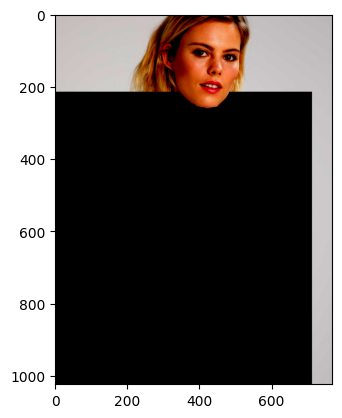

In [12]:
show(rand_sample['masked_image'], print_shape=True)

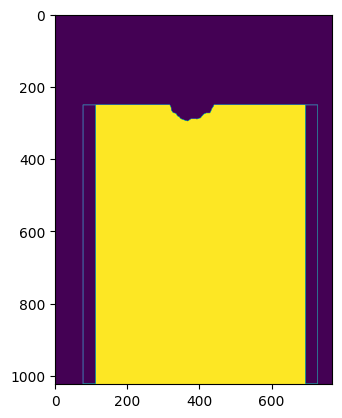

In [68]:
show(dataset[3]['mask'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


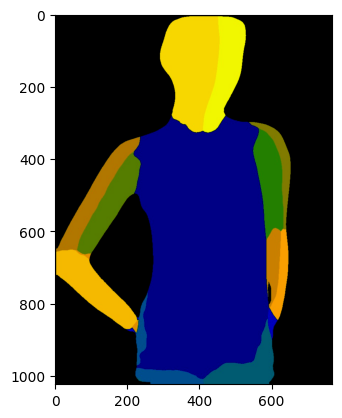

In [13]:
show(rand_sample['densepose'], print_shape=True)

torch.Size([1024, 768, 1])


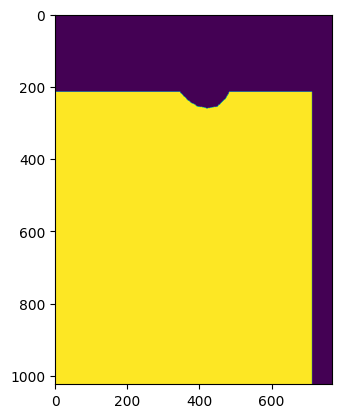

In [14]:
# This image is actually binary image but
# we converted it from PIL Image to Pytorch Tensor
# so the color space is not white-black one
show(rand_sample['mask'], print_shape=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


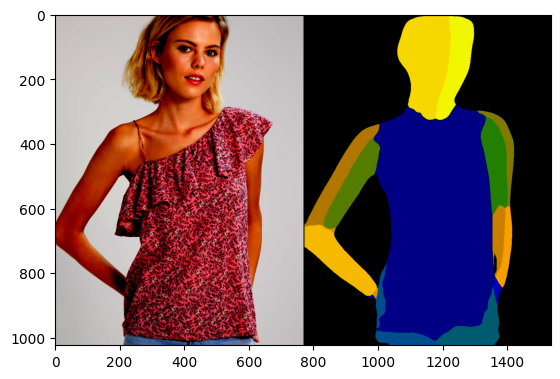

In [15]:
show(torch.cat([rand_sample['image'], rand_sample['densepose']], dim=-1))

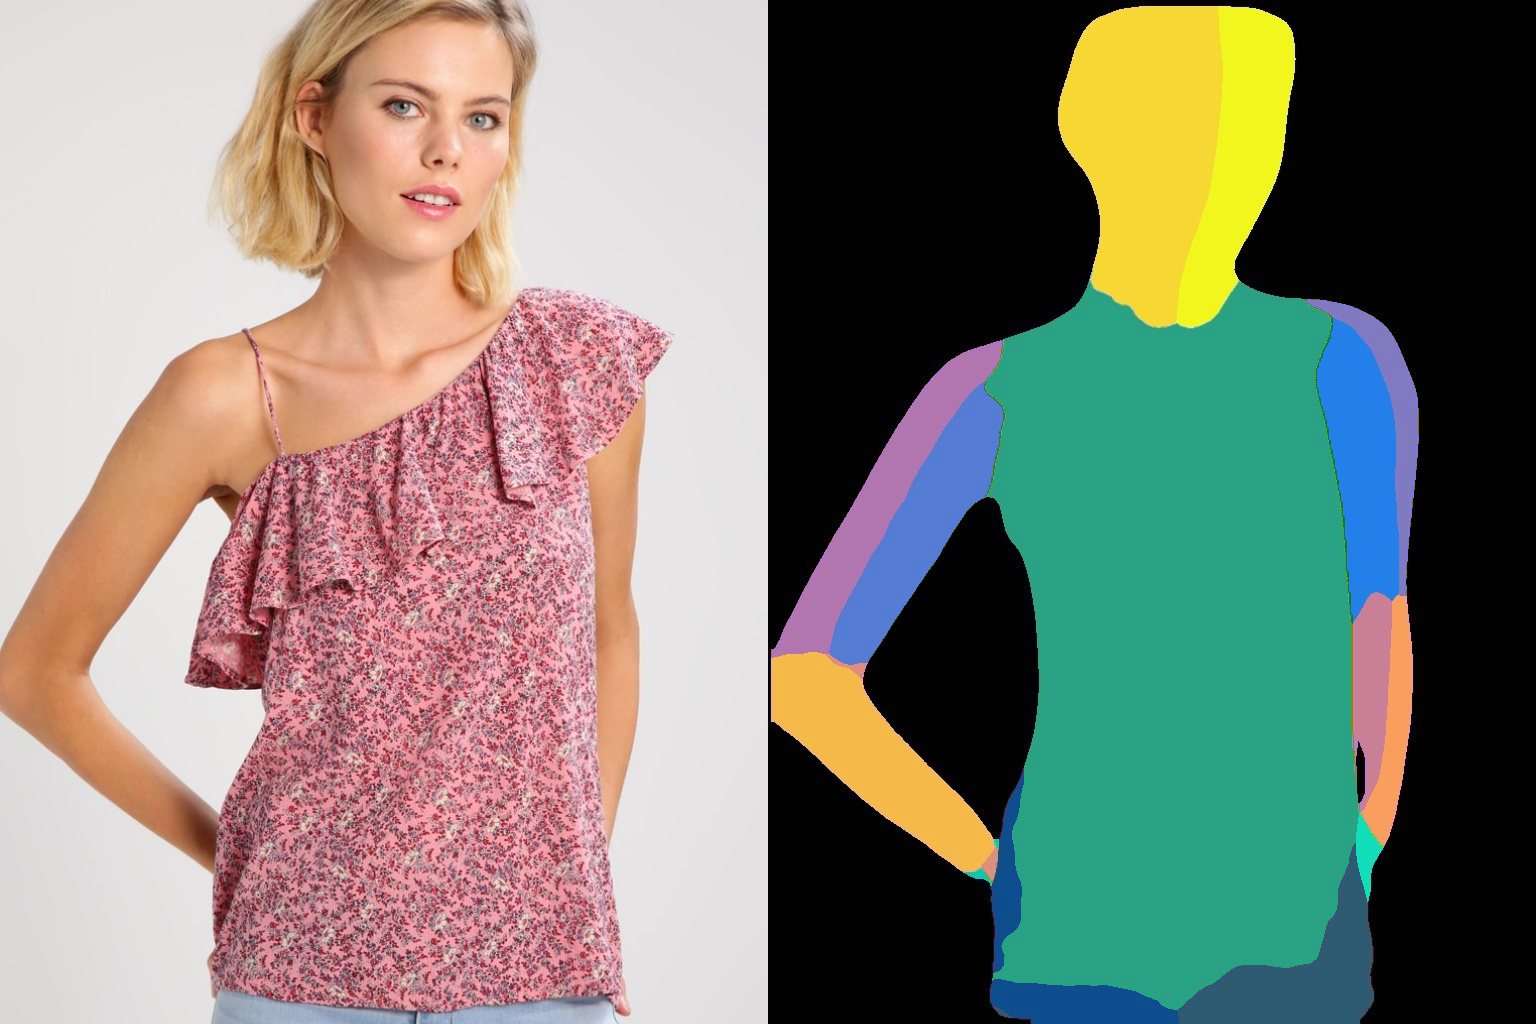

In [16]:
origin_img = to_pil_image(rand_sample['original_image'])
dense_img = to_pil_image(rand_sample['densepose'])
new_img = PIL.Image.new('RGB', (origin_img.width * 2, origin_img.height))
new_img.paste(origin_img, (0, 0))
new_img.paste(dense_img, (origin_img.width, 00))
new_img